# Project: Wrangle and Analyze data

## Table of Contents
<ul>
<li><a href="#gather">Gather</a></li>
<li><a href="#access">Access</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#analyze">Analyze</a></li>
</ul>

In [3]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='gather'></a>
## Gather

In [4]:
# Read CSV (comma-separated) file into DataFrame
wrd = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# Download files using request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
# Import the TSV file into a DataFrame
img= pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
import tweepy

consumer_key = 'Your Consumer Key here'
consumer_secret = 'Your Consumer Secret here'
access_token = 'Your Access Token here'
access_secret = 'Your Consumer Key here'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
tweet_ids = wrd.tweet_id.values
len(tweet_ids)

2356

In [69]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError:
            print(str(tweet_id) +"Fail")


888202515573088257Fail
873697596434513921Fail
872668790621863937Fail
872261713294495745Fail
869988702071779329Fail
866816280283807744Fail
861769973181624320Fail
856602993587888130Fail
851953902622658560Fail
845459076796616705Fail
844704788403113984Fail
842892208864923648Fail
837366284874571778Fail
837012587749474308Fail
829374341691346946Fail
827228250799742977Fail
812747805718642688Fail
802247111496568832Fail
779123168116150273Fail
775096608509886464Fail
771004394259247104Fail
770743923962707968Fail
759566828574212096Fail


Rate limit reached. Sleeping for: 588


754011816964026368Fail
680055455951884288Fail


Rate limit reached. Sleeping for: 597


676975532580409345Fail


In [106]:
tweet_list = []
with open("tweet_json.txt") as tweetfile:
    for line in tweetfile:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        tweet_favorites= tweet['favorite_count']
        tweet_retweets= tweet['retweet_count']
        tweet_list.append({'tweet_id': tweet_id, 'favorites': tweet_favorites, 'retweets': tweet_retweets})
        




In [107]:
ts = pd.DataFrame(tweet_list)

In [108]:
ts.head()

,tweet_id,favorites,retweets
0,892420643555336193,36067,7678
1,892177421306343426,31109,5678
2,891815181378084864,23422,3763
3,891689557279858688,39343,7851
4,891327558926688256,37585,8449


In [109]:
ts.to_csv('tweet_stats.csv', index = False)

In [111]:
tweets = pd.DataFrame(tweet_list)

In [7]:
tweets = pd.read_csv('tweet_stats.csv')

<a id='access'></a>
## Assess

In [9]:
# Display the patients table
wrd

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
wrd.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
pd.set_option('display.max_row', 10)

#### Tidiness
- Four existing columns for dog stage, doggo, floofer, pupper, puppo
- No need for retweets and replies
- Three dog breed predictions, only need the first true one


In [15]:
img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
img.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [19]:
wrd.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
wrd.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
wrd.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
wrd.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [23]:
wrd.rating_numerator.value_counts()

12     558
11     464
10     461
13     351
9      158
      ... 
27       1
45       1
99       1
121      1
204      1
Name: rating_numerator, Length: 40, dtype: int64

In [24]:
wrd.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
       ... 
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, Length: 18, dtype: int64

In [25]:
img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
tweets

,tweet_id,favorites,retweets
0,892420643555336193,36067,7678
1,892177421306343426,31109,5678
2,891815181378084864,23422,3763
3,891689557279858688,39343,7851
4,891327558926688256,37585,8449
...,...,...,...
2325,666049248165822465,96,40
2326,666044226329800704,271,131
2327,666033412701032449,112,41
2328,666029285002620928,121,42


In [27]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2330 non-null   int64
 1   favorites  2330 non-null   int64
 2   retweets   2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [28]:
tweets.favorites.sort_values(ascending=True)

395          0
446          0
439          0
437          0
434          0
         ...  
1055    114972
129     116051
517     120177
397     132594
1015    155584
Name: favorites, Length: 2330, dtype: int64

In [29]:
tweets.retweets.sort_values(ascending=True)

279         1
262         2
328         2
1271        2
109         3
        ...  
65      40477
397     43632
517     56477
1055    57503
1015    77509
Name: retweets, Length: 2330, dtype: int64

#### Quality
##### `WeRateDog Twitter Archive` table
- Timestamp not in date format
- Rating Numerator and Dominator are not our of 10
- Dog names contains wrong extraction
- Dog types as None
- Some no values cells are in string format of NaN


##### `Image Prediction` table
- Some predictions do not have capital letter in upper case
- Dog prediction should be in categorical value


##### `Retweet and Likes` table
- Several errors occured when extract the json from Twitter

<a id='clean'></a>
## Clean

In [30]:
# Copy dataframes
wrd_clean = wrd.copy()
img_clean = img.copy()
tweets_clean = tweets.copy()

#### 1

#### Define

Merging three datasets into one using the join function. Therefore, we cans start cleaning on a tidy structure.

#### Code

In [31]:
# Merge the tables
wrd_clean = pd.merge(left=wrd_clean, right=img_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
wrd_clean = pd.merge(left=wrd_clean, right=tweets_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

#### Test

In [32]:
wrd_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,36067,7678
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,31109,5678
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,23422,3763
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39343,7851
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37585,8449


#### 2

#### Define

Remove all unwanted retweets.

#### Code

In [33]:
# Only keep the rows with null retweet status and user id values
wrd_clean = wrd_clean[wrd_clean['retweeted_status_id'].isnull()]
wrd_clean = wrd_clean[wrd_clean['retweeted_status_user_id'].isnull()]
wrd_clean = wrd_clean[wrd_clean['retweeted_status_timestamp'].isnull()]

#### Test

In [34]:
# Check for any not null values
wrd_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [35]:
# Check for any not null values
wrd_clean.retweeted_status_user_id.value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

In [36]:
# Check for any not null values
wrd_clean.retweeted_status_timestamp.value_counts()

Series([], Name: retweeted_status_timestamp, dtype: int64)

#### 3

#### Define

Remove all unwanted replies.

#### Code

In [37]:
# Only keep the rows with null reply status and user id values
wrd_clean = wrd_clean[wrd_clean['in_reply_to_status_id'].isnull()]
wrd_clean = wrd_clean[wrd_clean['in_reply_to_user_id'].isnull()]


#### Test

In [38]:
# Check for any not null values
wrd_clean.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

In [39]:
# Check for any not null values
wrd_clean.in_reply_to_user_id.value_counts()

Series([], Name: in_reply_to_user_id, dtype: int64)

#### 4

#### Define

Convert timestamp to yyyy/mm.

#### Code

In [40]:
# Use to datetime to convert timestamp column
wrd_clean.timestamp = wrd_clean['timestamp'].str.extract('(201\d-\d\d)')

#### Test

In [41]:
# Show the cleaned timestamp
wrd_clean.timestamp.head()

0    2017-08
1    2017-08
2    2017-07
3    2017-07
4    2017-07
Name: timestamp, dtype: object

#### 5

#### Define

Convert the scores to (Score/10) format.

#### Code

In [42]:
# Calculate the score out of time by interger dividing numerator by dominator times 10
score= (wrd_clean.rating_numerator * 10//wrd_clean.rating_denominator) 

In [43]:
# Sort to check numbers out of the limits
score.sort_values(ascending=False).head(10)

789     1776
1780     420
548       75
406       34
603       27
1438      26
150       14
743       14
165       14
50        14
dtype: int64

In [44]:
score.sort_values(ascending=True).head(10)

241     0
1964    1
1581    1
1797    1
2040    1
1482    2
954     2
2028    2
1785    2
1628    2
dtype: int64

In [45]:
# Clean score > 14
wrd_clean = pd.concat( [wrd_clean, score.rename('score')], axis=1)
wrd_clean.loc[(wrd_clean['score'] > 15), 'score'] = 14

#### Test

In [46]:
# Check for outliers
wrd_clean.score.describe()

count    1963.000000
mean       10.534386
std         2.188659
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: score, dtype: float64

#### 6

#### Define

Keep the true prediction with the highest confidence level.

#### Code

In [47]:
# Use conitions to create new columns for dog breed and confidence
wrd_clean.loc[(wrd_clean['p1_dog'] == True), 'prediction'] = wrd_clean['p1']
wrd_clean.loc[(wrd_clean['p2_dog'] == True) & (wrd_clean['p1_dog'] == False), 'prediction'] = wrd_clean['p2']
wrd_clean.loc[(wrd_clean['p3_dog'] == True) & (wrd_clean['p1_dog'] == False) & (wrd_clean['p2_dog'] == False), 'prediction'] = wrd_clean['p3']
wrd_clean.loc[(wrd_clean['p3_dog'] == False) & (wrd_clean['p1_dog'] == False) & (wrd_clean['p2_dog'] == False), 'prediction'] = "NaN"

wrd_clean.loc[(wrd_clean['p1_dog'] == True), 'confidence'] = wrd_clean['p1_conf']
wrd_clean.loc[(wrd_clean['p2_dog'] == True) & (wrd_clean['p1_dog'] == False), 'confidence'] = wrd_clean['p2_conf']
wrd_clean.loc[(wrd_clean['p3_dog'] == True) & (wrd_clean['p1_dog'] == False) & (wrd_clean['p2_dog'] == False), 'confidence'] = wrd_clean['p3_conf']
wrd_clean.loc[(wrd_clean['p3_dog'] == False) & (wrd_clean['p1_dog'] == False) & (wrd_clean['p2_dog'] == False), 'confidence'] = "NaN"


#### Test

In [48]:
# Take a look at the dog types
wrd_clean.prediction.value_counts()

NaN                   305
golden_retriever      156
Labrador_retriever    104
Pembroke               94
Chihuahua              90
                     ... 
clumber                 1
Japanese_spaniel        1
Irish_wolfhound         1
EntleBucher             1
Scotch_terrier          1
Name: prediction, Length: 114, dtype: int64

In [49]:
# Take a look at the confidence
wrd_clean.confidence

0            NaN
1       0.323581
2       0.716012
3       0.168086
4       0.555712
          ...   
2053    0.560311
2054    0.408143
2055    0.596461
2056    0.506826
2057    0.465074
Name: confidence, Length: 1963, dtype: object

#### 7

Tidy up the dog breeds by capitalize first letters and remove underscore.

In [50]:
# Drop all NaN values in the prediction column
wrd_clean['prediction'].replace('NaN', np.nan, inplace=True)
wrd_clean.dropna(subset=['prediction'],inplace=True)



In [51]:
# Capitalize every first character 
wrd_clean.prediction = wrd_clean.prediction.str.title()

In [52]:
# Use pandas replace with replace underscore with space.
wrd_clean.prediction = wrd_clean.prediction.replace("_"," ",regex=True)

In [53]:
# Save god breeds as catogorical datatype
wrd_clean['prediction'] = wrd_clean['prediction'].astype('category')


#### Test

In [54]:
# Take a look at the dog types
wrd_clean.prediction

1                      Chihuahua
2                      Chihuahua
3             Labrador Retriever
4                         Basset
5       Chesapeake Bay Retriever
                  ...           
2053          Miniature Pinscher
2054         Rhodesian Ridgeback
2055             German Shepherd
2056                     Redbone
2057      Welsh Springer Spaniel
Name: prediction, Length: 1658, dtype: category
Categories (113, object): [Afghan Hound, Airedale, American Staffordshire Terrier, Appenzeller, ..., West Highland White Terrier, Whippet, Wire-Haired Fox Terrier, Yorkshire Terrier]

#### 8

#### Define

Merge doggo, floofer, pupper, puppo into one column.

#### Code

In [55]:
# Extracting the dog stages into a new column, in descending order
wrd_clean.loc[(wrd_clean['puppo'] == 'puppo'), 'stage'] = wrd_clean['puppo']
wrd_clean.loc[(wrd_clean['pupper'] == 'pupper'), 'stage'] = wrd_clean['pupper']
wrd_clean.loc[(wrd_clean['floofer'] == 'floofer'), 'stage'] = wrd_clean['floofer']
wrd_clean.loc[(wrd_clean['doggo'] == 'doggo'), 'stage'] = wrd_clean['doggo']



#### Test

In [56]:
# Take a look at the dog stages
wrd_clean.stage.head(50)

1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
       ...  
49       NaN
50    pupper
53       NaN
54       NaN
55       NaN
Name: stage, Length: 50, dtype: object

#### 9

#### Define

Some columns contain false prediction but occur in the cleaned data. Let's remove them.

#### Code

In [57]:
# Check for invalid names
wrd_new.name.value_counts()

NameError: name 'wrd_new' is not defined

In [58]:
# Display full text length
pd.options.display.max_colwidth = 120

In [59]:
# Show all dogs named 'a'
wrd_clean.text[wrd_clean.name == 'a']

50      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: p...
636     Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10...
809     This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10...
811     Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk h...
820     This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https...
                                                                 ...                                                           
2050    Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog...
2052    This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 wo

In [60]:
# The false preiction contains the phrase - 'only rate dogs'. Remove these columns
wrd_clean.text = wrd_clean.text.replace(".+only rate dogs.+",np.nan,regex=True)
wrd_clean.dropna(subset=['text'],inplace=True)

#### Test

In [61]:
# Show 'a' with no dog names
wrd_clean.text[wrd_clean.name == 'a']

50      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: p...
809     This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10...
811     Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk h...
846     This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately h...
1109         Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu
                                                                 ...                                                           
2050    Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog...
2052    This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 wo

#### 10

#### Define

Correct names for 'a', 'the' and other invaild names for dogs.

#### Code

pd.set_option('display.max_row', 50)

In [62]:
# Find out which name to fix
wrd_new.name.value_counts().head(50)

NameError: name 'wrd_new' is not defined

In [63]:
# These 'none' names do not include any dog names
wrd_clean[wrd_clean.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,score,prediction,confidence,stage
5,891087950875897856,NaN,NaN,2017-07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,True,Indian_elephant,0.076902,False,18937,2835,13,Chesapeake Bay Retriever,0.425595,NaN
7,890729181411237888,NaN,NaN,2017-07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237...",...,True,Pembroke,0.076507,True,60749,17133,13,Pomeranian,0.566142,NaN
12,889665388333682689,NaN,NaN,2017-07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,...,True,basenji,0.004633,True,44895,9085,13,Pembroke,0.966327,puppo
23,887343217045368832,NaN,NaN,2017-07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,...,False,Weimaraner,0.134203,True,31454,9520,13,Mexican Hairless,0.330741,NaN
33,885167619883638784,NaN,NaN,2017-07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638...",...,True,Eskimo_dog,0.055770,True,20454,3971,13,Malamute,0.812482,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,666082916733198337,NaN,NaN,2015-11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916733198337/photo/1,...,True,French_bulldog,0.048960,True,103,41,6,Pug,0.489814,NaN
2045,666073100786774016,NaN,NaN,2015-11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100786774016/photo/1,...,True,Ibizan_hound,0.097471,True,297,146,10,Walker Hound,0.260857,NaN
2046,666071193221509120,NaN,NaN,2015-11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193221509120/photo/1,...,True,Pekinese,0.109454,True,136,52,9,Gordon Setter,0.503672,NaN
2053,666049248165822465,NaN,NaN,2015-11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,...,True,Doberman,0.154629,True,96,40,5,Miniature Pinscher,0.5

In [64]:
# 'The' name do not include dog names
wrd_clean.text[wrd_clean.name == 'the']

1339    This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all...
1515                           This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb
1531                                 This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF
1744    This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 1...
2047                This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK
2048    Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog http...
Name: text, dtype: object

In [65]:
# 'one' name do not include dog names
wrd_clean.text[wrd_clean.name == 'one']

284                    Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
802     This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10...
1644                            This is one esteemed pupper. Just graduated college. 10/10 what a champ https://t.co/nyReCVRiyd
Name: text, dtype: object

In [66]:
# 'O' name contains dog name
wrd_clean.text[wrd_clean.name == 'O']

613    This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC
Name: text, dtype: object

In [67]:
# Change dog name using index
wrd_clean.loc[613, 'name'] = 'O\'Malley'

In [68]:
# 'just' name do not include dog names
wrd_clean.text[wrd_clean.name == 'just']

858     This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
1214             This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
1726              This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP
Name: text, dtype: object

In [69]:
# 'officially' name do not include dog names
wrd_clean.text[wrd_clean.name == 'officially']

1470    This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE
Name: text, dtype: object

In [70]:
# 'my' name contains dog name
wrd_clean.text[wrd_clean.name == 'my']

679    This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https...
Name: text, dtype: object

In [71]:
# Change dog name using index
wrd_clean.loc[679, 'name'] = 'Zoey'

In [72]:
# 'an' name includes dog names
wrd_clean.text[wrd_clean.name == 'an']

825     This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 h...
1908    This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 ...
2035    This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively ...
2037    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 htt...
Name: text, dtype: object

In [73]:
# Extract all dogs names after named, in named 'an' column.
wrd_clean.text[wrd_clean['name'] == "an"].str.extract("named ([A-Z][a-z]+)\.")

,0
825,NaN
1908,Berta
2035,NaN
2037,NaN


In [74]:
# Replace original name with extracted names
anname = wrd_clean.text[wrd_clean['name'] == "an"].str.extract("named ([A-Z][a-z]+)\.")
wrd_clean['anname'] = anname
wrd_clean.loc[(wrd_clean['name'] == "an"), 'name'] = wrd_clean['anname']

In [75]:
# Extract all dogs names after named, in named 'a' column.
wrd_clean.text[wrd_clean['name'] == "a"].str.extract("named ([A-Z][a-z]+)\.")

,0
50,NaN
809,NaN
811,NaN
846,NaN
1109,NaN
...,...
2050,NaN
2052,NaN
2054,NaN
2055,NaN


In [76]:
# Replace original name with extracted names
aname = wrd_clean.text[wrd_clean['name'] == "a"].str.extract("named ([A-Z][a-z]+)\.")
wrd_clean['aname'] = aname
wrd_clean.loc[(wrd_clean['name'] == "a"), 'name'] = wrd_clean['aname']

In [77]:
# Replace with 'None' in names
wrd_clean['name'].replace(np.nan, 'None', inplace=True)
wrd_clean['name'].replace('the', 'None', inplace=True)
wrd_clean['name'].replace('an', 'None', inplace=True)
wrd_clean['name'].replace('one', 'None', inplace=True)
wrd_clean['name'].replace('just', 'None', inplace=True)
wrd_clean['name'].replace('officially', 'None', inplace=True)






#### Test

In [78]:
# The news names in name column match the extracted name.
wrd_clean.name.loc[2013]

'Octaviath'

In [79]:
wrd_clean.name.loc[1908]

'Berta'

In [80]:
wrd_clean.name.loc[613]

"O'Malley"

In [81]:
pd.set_option('display.max_row', 1000)

In [82]:
# Do another check
wrd_clean.name.value_counts()

None              410
Cooper              9
Oliver              9
Lucy                9
Charlie             9
Tucker              9
Penny               8
Daisy               7
Winston             7
Sadie               7
Koda                6
Lola                6
Jax                 6
Toby                6
Oscar               5
Rusty               5
Stanley             5
Bo                  5
Bella               5
Leo                 5
Alfie               4
Larry               4
Cassie              4
Gus                 4
Zoey                4
Maggie              4
Sophie              4
Finn                4
Oakley              4
Milo                4
Bailey              4
Bear                4
Dexter              4
Brody               4
Winnie              4
Bentley             4
Louis               4
Chester             4
Jack                4
Scout               4
Duke                4
George              4
Dave                4
Scooter             4
Wyatt               3
Clark     

#### 11

#### Define

Drop columns which would not be used and create a new dataframe for visualization.

#### Code

In [83]:
# only keep the columns we want
wrd_new = wrd_clean[['tweet_id', 'timestamp', 'text','expanded_urls', 'name', 'prediction','confidence','stage', 'score','favorites','retweets']].copy()


#### Test

In [84]:
wrd_new.head()

,tweet_id,timestamp,text,expanded_urls,name,prediction,confidence,stage,score,favorites,retweets
1,892177421306343426,2017-08,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,Chihuahua,0.323581,NaN,13,31109,5678
2,891815181378084864,2017-07,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. ...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,Chihuahua,0.716012,NaN,12,23422,3763
3,891689557279858688,2017-07,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,Labrador Retriever,0.168086,NaN,13,39343,7851
4,891327558926688256,2017-07,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688...",Franklin,Basset,0.555712,NaN,12,37585,8449
5,891087950875897856,2017-07,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: t...,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,Chesapeake Bay Retriever,0.425595,NaN,13,18937,2835


In [85]:
# Store the cleaned data as a csv file.
wrd_new.to_csv('twitter_archive_master.csv', index = False)

<a id='analyze'></a>
## Analyze 

## Visual 1. The most common dog breeds in our list.

In [86]:
# Top 20 dog list
wrd_new.prediction.value_counts().head(20)

Golden Retriever            154
Labrador Retriever           98
Pembroke                     91
Chihuahua                    89
Pug                          59
Toy Poodle                   49
Chow                         44
Pomeranian                   41
Samoyed                      38
Malamute                     31
Cocker Spaniel               29
Chesapeake Bay Retriever     29
French Bulldog               28
Miniature Pinscher           24
Eskimo Dog                   22
Cardigan                     21
German Shepherd              21
Beagle                       20
Siberian Husky               20
Shih-Tzu                     20
Name: prediction, dtype: int64

Text(0.5, 1.0, 'Most Common Dog Breeds')

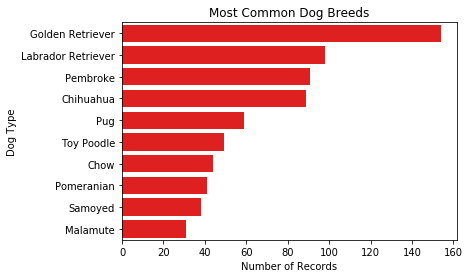

In [87]:
# Create a bar plot featuring top 10 common dogs
dog_order = wrd_new['prediction'].value_counts().index
sb.countplot(data = wrd_new, color= 'r', y = 'prediction', order = dog_order[:10])
plt.xlabel('Number of Records')
plt.ylabel('Dog Type')
plt.title('Most Common Dog Breeds')



Text(0.5, 0, 'proportion')

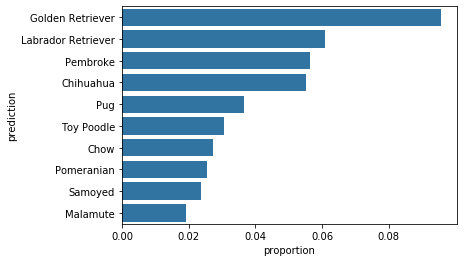

In [88]:
# Get order of bars by frequency
type_counts = wrd_new['prediction'].value_counts()
type_order = wrd_new['prediction'].value_counts().index

# Compute largest proportion
n_dog = wrd_new.shape[0]
max_type_count = type_counts.max()
max_prop = max_type_count / n_dog

# Establish tick locations and create plot
base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]


base_color = sb.color_palette()[0]
sb.countplot(data = wrd_new, y = 'prediction', color = base_color, order = type_order[:10])
plt.xticks(tick_props * n_dog, tick_names)
plt.xlabel('proportion')



#### Golden Retriever was the most common dog breeds on We Rate Dogs, accounting for roughly 9% of all posts. The second most common dog type was Labrador Retriever, at around 6%.

##  Visual 2. Dog ranking by likes and retweets.

In [89]:
# Create a new column for likes+retweets
wrd_new['activity'] = wrd_new['favorites'] + wrd_new['retweets']
df_activity = wrd_new.filter(['prediction','activity'], axis=1)

In [90]:
df_activity = df_activity.groupby('prediction').sum()
df_activity = df_activity.sort_values(by='activity', ascending = False)
df_activity = df_activity.head(10)
df_activity

,activity
prediction,
Golden Retriever,2284325
Labrador Retriever,1328190
Pembroke,1185807
Chihuahua,907191
French Bulldog,684674
Samoyed,566897
Cocker Spaniel,489126
Pug,441477
Chow,401327


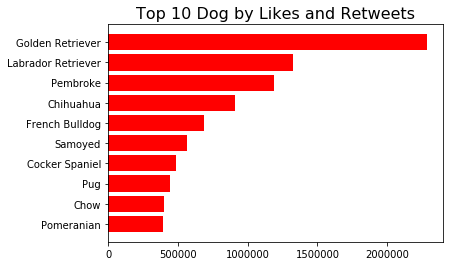

In [91]:
# Create bar plot for most popular dogs
plt.barh(df_activity.index, df_activity.activity, color = 'r')
plt.title('Top 10 Dog by Likes and Retweets', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

## Visual 3. Does the most top rated dog get the most likes and retweets?

Text(0.5, 1.0, 'Score vs Activity')

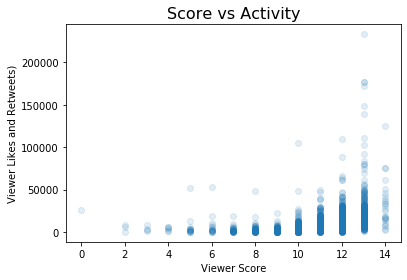

In [92]:
# Create Scatterplot for score and activity
plt.scatter(data = wrd_new, x = 'score', y = 'activity', alpha = 1/8)
plt.xlabel('Viewer Score')
plt.ylabel('Viewer Likes and Retweets)')
plt.title('Score vs Activity', fontsize = 16)

Text(0.5, 1.0, 'Score vs Activity')

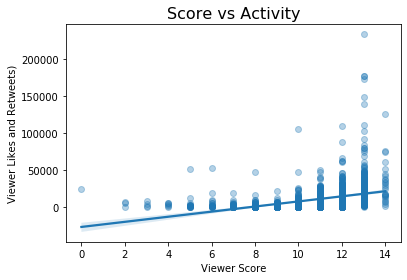

In [93]:
# Create Regressionplot for score and activity
sb.regplot(data = wrd_new, x = 'score', y = 'activity', scatter_kws = {'alpha' : 1/3})
plt.xlabel('Viewer Score')
plt.ylabel('Viewer Likes and Retweets)')
plt.title('Score vs Activity', fontsize = 16)

Text(0, 0.5, 'Viewer Likes and Retweets)')

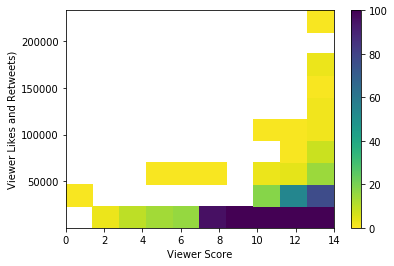

In [94]:
# Create Heatplot for score and activity
plt.hist2d(data = wrd_new, x = 'score', y = 'activity', cmin=0.5, cmap='viridis_r',vmin=0, vmax=100)
plt.colorbar()
plt.xlabel('Viewer Score')
plt.ylabel('Viewer Likes and Retweets)')

#### Generally, a higher dog score does not asscoicates with higher view activity. However, the most popular posts with viewers all have highest viewer score.

4.Winner Post of every month by likes and retweets.

In [95]:
# Create a list for the most popular post of every month by likes+retweets
winner = wrd_new.groupby('timestamp')['activity'].max().tolist()
winner_list = wrd_new[wrd_new['activity'].isin(winner)]
winner_list = winner_list.sort_values(by='timestamp', ascending = True)
winner_list

,tweet_id,timestamp,text,expanded_urls,name,prediction,confidence,stage,score,favorites,retweets,activity
1996,667152164079423490,2015-11,This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pi...,https://twitter.com/dog_rates/status/667152164079423490/photo/1,Pipsy,Toy Poodle,0.535411,NaN,12,45391,15997,61388
1487,678399652199309312,2015-12,This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm,https://twitter.com/dog_rates/status/678399652199309312/video/1,None,Bedlington Terrier,0.0150472,NaN,12,78053,31214,109267
1392,682962037429899265,2016-01,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 ...,https://twitter.com/dog_rates/status/682962037429899265/photo/1,Darrel,Chihuahua,0.155207,NaN,6,36528,16422,52950
1184,698195409219559425,2016-02,Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both ...,https://twitter.com/dog_rates/status/698195409219559425/photo/1,Beau,Labrador Retriever,0.64369,NaN,9,16636,5932,22568
1092,706310011488698368,2016-03,Here's a very sleepy pupper. Thinks it's an airplane. 12/10 would snug for eternity https://t.co/GGmcTIkBbf,"https://twitter.com/dog_rates/status/706310011488698368/photo/1,https://twitter.com/dog_rates/status/706310011488698...",None,Pembroke,0.698165,pupper,12,21104,7852,28956
973,718631497683582976,2016-04,We normally don't rate marshmallows but this one appears to be flawlessly toasted so I'll make an exception. 10/10 h...,https://twitter.com/dog_rates/status/718631497683582976/photo/1,None,Pomeranian,0.993718,NaN,10,18652,7947,26599
904,733109485275860992,2016-05,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",https://twitter.com/dog_rates/status/733109485275860992/photo/1,None,Golden Retriever,0.945523,doggo,12,49755,16703,66458
838,744234799360020481,2016-06,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,None,Labrador Retriever,0.825333,doggo,13,155584,77509,233093
740,756288534030475264,2016-07,Here's a heartwarming scene of a single father raising his two pups. Downright awe-inspiring af. 12/10 for everyone ...,"https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475...",None,French Bulldog,0.0324922,NaN,12,44053,17743,61796
656,769940425801170949,2016-08,This is Klein. These pics were taken a month apart. He knows he's a stud now. 12/10 total heartthrob https://t.co/gu...,"https://twitter.com/dog_rates/status/769940425801170949/photo/1,https://twitter.com/dog_rates/status/769940425801170...",Klein,Miniature Pinscher,0.796313,NaN,12,31556,9649,41205


#### This will be useful for the We Rate Dog blog post.

Reference:
https://stackoverflow.com/questions/36938905/read-text-file-and-dump-to-json-object
<br>
https://code.i-harness.com/en/q/19c9fbc
<br>
https://stackoverflow.com/questions/1549641/how-to-capitalize-the-first-letter-of-each-word-in-a-string
<br>
https://stackoverflow.com/questions/16309524/how-to-replace-the-colons-in-this-text-using-python
<br>
https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe
<br>
https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p